In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import georges

from georges.ptw import SpreadOutBraggPeakAnalysis, \
                        BraggPeakAnalysis, \
                        LateralProfileAnalysis

### Load Bragg peak library

In [2]:
Bragg_peak_data = pd.read_csv('Bragg_peak_library.csv')

In [3]:
Bragg_peak_data.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
Bragg_peak_data

,dose_0,dose_1,dose_2,dose_3,dose_4,dose_5,dose_6,dose_7,dose_8,dose_9,...,dose_23,dose_24,dose_25,dose_26,dose_27,dose_28,dose_29,dose_30,dose_31,dose_32
0,29.305970,28.456790,27.674558,27.908609,29.153449,29.093251,29.135493,31.921335,30.633542,30.974904,...,47.035697,48.669644,52.082294,54.983006,60.143727,69.339350,76.135522,98.108050,100.000000,100.000000
1,28.896193,28.272054,27.943591,28.219164,28.945203,29.152415,29.066101,32.004638,30.707039,30.635269,...,48.604502,49.624684,52.282261,56.471765,62.162623,70.433762,78.371031,99.447052,81.301611,58.760323
2,29.192865,27.983683,27.654608,28.456325,29.380818,29.015298,29.058625,31.880572,30.904909,30.784909,...,47.650818,48.865771,52.849201,57.497355,63.999958,73.361048,83.057432,100.000000,65.552222,52.219319
3,28.986518,28.233308,27.762435,28.502983,29.510507,28.472735,29.310578,32.434405,31.199518,30.654258,...,49.201942,50.291619,53.638581,59.153232,63.719965,75.640879,88.899811,94.874490,47.297088,23.422329
4,28.965563,27.967515,28.039914,28.648042,29.128194,28.879831,28.885196,32.237011,30.906008,30.870161,...,50.012856,50.331275,54.479597,58.956444,64.590536,74.943677,92.252393,86.744937,35.844735,8.780087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.451855,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
151,0.135624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
152,0.128706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
153,0.063089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Add z axis

In [5]:
z_values = np.arange(0,100.25,0.25)
z_values = (z_values[0:-1] + (z_values[1:] - z_values[0:-1])[0]/2)[0:155]

In [6]:
Bragg_peak_data['z'] = z_values

### Compute SOBP

In [7]:
sobp_analysis = SpreadOutBraggPeakAnalysis(dose_data=Bragg_peak_data.drop(columns='z').T.iloc[0:],
                                           method='scipy.optimize',
                                           z_axis=z_values[0:155],
                                           modul_type='Full')

In [8]:
sobp_analysis.compute_weights()

array([9.35758486e-03, 5.87483328e-04, 2.60787553e-03, 1.48048163e-03,
       1.19609676e-03, 1.43494937e-03, 8.44006856e-04, 1.13236993e-03,
       7.97970708e-04, 8.38044747e-04, 7.14761248e-04, 6.16310619e-04,
       9.30457128e-04, 5.58620097e-04, 8.37501213e-04, 1.40776705e-04,
       9.79313489e-04, 0.00000000e+00, 8.82500511e-04, 0.00000000e+00,
       7.65222895e-04, 1.09040031e-05, 7.16126245e-04, 8.05854684e-05,
       3.08213357e-04, 4.92960012e-04, 0.00000000e+00, 3.60691502e-04,
       3.76049207e-04, 1.58537403e-04, 2.59843525e-04, 1.24648850e-04,
       7.49235721e-05])

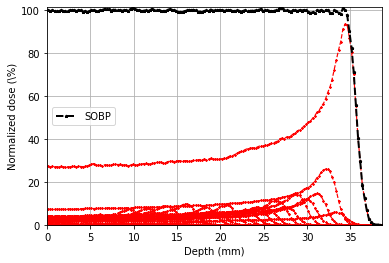

In [9]:
sobp_analysis.view_sobp(with_pristine_peaks=True)

In [10]:
sobp_array = 1e2*sobp_analysis.compute_sobp_profile()

In [11]:
sobp_properties = sobp_analysis.compute_ranges_and_flatness()
sobp_properties

(array(36.737453), array(34.88531876), array(34.59740813), 1.434996134322228)

### Lateral profile

In [12]:
profile_df = pd.read_csv('lateral_profile.csv')

In [13]:
profile_df

,x,dose
0,-24.5,0.051404
1,-24.0,0.086457
2,-23.5,0.131742
3,-23.0,0.185070
4,-22.5,0.205708
...,...,...
95,23.0,0.217186
96,23.5,0.176747
97,24.0,0.191881
98,24.5,0.118081


In [14]:
lp_analysis = LateralProfileAnalysis(dose_profile=profile_df['dose'],
                                     positions=profile_df['x'])

In [15]:
lp_analysis.get_field_size()

29.34926688907517

In [16]:
lp_analysis.get_penumbra()

0.7301051343808869